請輸入參數sigma= 0.1
請輸入參數a= 0.1
請輸入timestep= 500
請輸入length(年數)= 1
請輸入forward rate= 0.05
請輸入num_paths= 20


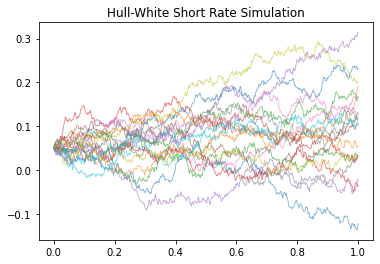

In [8]:
#導入套件
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

#輸入參數
sigma = float(input("請輸入參數sigma= "))
a = float(input("請輸入參數a= "))
timestep = int(input("請輸入timestep= "))
length = float(input("請輸入length(年數)= "))
forward_rate = float(input("請輸入forward rate= "))
day_count = ql.Thirty360()
time = time.localtime( time.time() )
todays_date = ql.Date(time.tm_mday, time.tm_mon, time.tm_year)
num_paths = int(input("請輸入num_paths= "))

#導入計算模型
ql.Settings.instance().evaluationDate = todays_date
spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

#num_paths = 4
time, paths = generate_paths(num_paths, timestep)
#print(paths) ==> short rate
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()



請輸入股價每年波動度(volatility)= 0.1
請輸入初始股價= 297


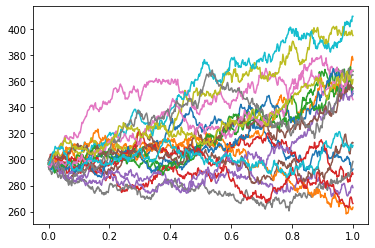

In [9]:
#模擬股價
import matplotlib.pyplot as plt
import numpy as np

# State Variables
#T = 10
#N = 10 # Path
#dt = 0.01
#mu = 0.01*dt # Rendite pro Zeiteinheit
#sigma = 0.1
#S0 = 100
#np.random.seed(1)

T = length
N = num_paths
dt = 1/timestep 
mu = paths
sigma = float(input("請輸入股價每年波動度(volatility)= "))
S0 = float(input("請輸入初始股價= "))
np.random.seed(1)

def genBrownPath (T, mu, sigma, S0, dt):
    
    n = round(T/dt)
    t = np.linspace(0, T, n + 1 )
    W = [0] + np.random.standard_normal(size = n+1) 
    W = np.cumsum(W)*np.sqrt(dt) # == standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X) # == geometric brownian motion
    plt.plot(t, S)
    return S

Paths = []
for i in range(0,num_paths):
    Paths.append(genBrownPath(T, mu[i], sigma, S0, dt))
plt.show()

In [10]:
#輸入基本資訊
K = float(input('請輸入strike price = '))
R = float(input('請輸入risk free rate = '))

#計算各個路徑的 Option Price 取平均再折現
Call = []
Put = []
for i in range(0, num_paths):
    Call.append(max(0, Paths[i][-1] -K) )
    Put.append(max(0, K - Paths[i][-1]) )
    
#計算折現值
Call_price = round(np.mean(Call)*np.exp(-R*T), 4)
Put_price = round(np.mean(Put)*np.exp(-R*T), 4)

print("Call Price = " + str(Call_price))
print("Put Price = " + str(Put_price))

請輸入strike price = 320
請輸入risk free rate = 0.1
Call Price = 25.3772
Put Price = 11.2541
